# Analyzing SuperMarket Sales

### I will be looking into the differences between 3 different supermarket branches, to see what the low performer needs to improve to compete with the top performer

https://www.kaggle.com/aungpyaeap/supermarket-sales

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Imports

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales = pd.read_csv('supermarket_sales - Sheet1.csv', parse_dates=[['Date', 'Time']])
sns.set()

# Reindexing and setting to datetime

In [228]:
sales.set_index('Date_Time', inplace=True)

In [220]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'HoursHalf'],
      dtype='object')

In [253]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,HoursHalf
Date_Time,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,First
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,First
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,First
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,Second
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2,First
2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4,Second
2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7,First


# How do ratings betweens branches look?

How do customers rate each branch?  We can see that Branch A on average has a higher rating, as B tends to have lower ratings, and C's high ratings are balanced out by lower ratings

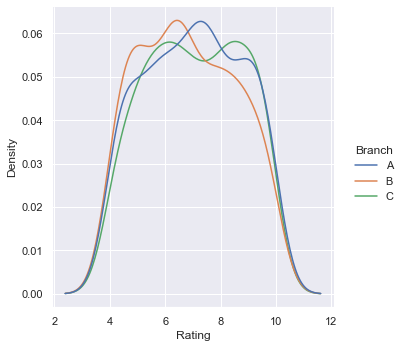

In [231]:
sns.displot(sales, x='Rating', hue_order=['A', 'B', 'C'],hue='Branch', kind='kde');

Creating a column to split the first half of the day and the second to run analysis on differences

In [232]:
sales['HoursHalf'] = 0

In [233]:
idxfirst = sales.loc[(sales.index.hour >= 10) & (sales.index.hour < 15)]['HoursHalf']
idxsecond = sales.loc[(sales.index.hour >= 15) & (sales.index.hour < 22)]['HoursHalf']

In [234]:
sales['HoursHalf'][idxfirst.index] = 'First'
sales['HoursHalf'][idxsecond.index] = 'Second'

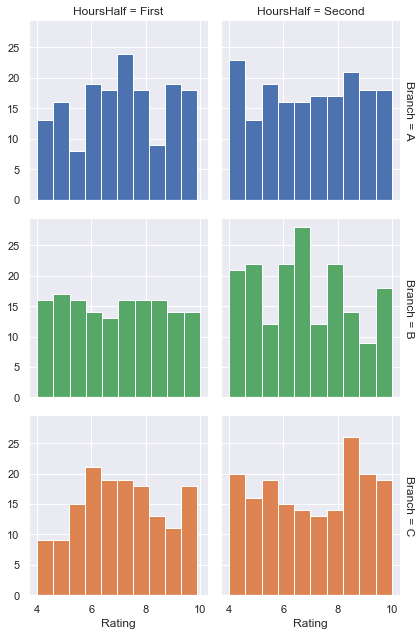

In [295]:
grid = sns.FacetGrid(sales, row_order=['A', 'B', 'C'], row='Branch', col='HoursHalf', margin_titles=True, hue='Branch')
grid.map(plt.hist, 'Rating')

### When were the biggest sales made the most?

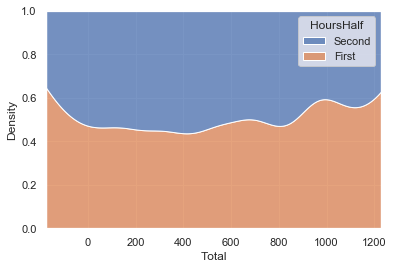

In [342]:
sns.kdeplot(data=sales, x='Total', hue='HoursHalf', hue_order=['Second', 'First'], multiple='fill')

# How do sales compare between stores?

## How do weekly total sales compare?

In [250]:
A = sales[sales['Branch']=='A']
B = sales[sales['Branch']=='B']
C = sales[sales['Branch']=='C']
A_weekmean = A.resample('W').mean()
B_weekmean = B.resample('W').mean()
C_weekmean = C.resample('W').mean()
A_weeksum = A.resample('W').sum()
B_weeksum = B.resample('W').sum()
C_weeksum = C.resample('W').sum()

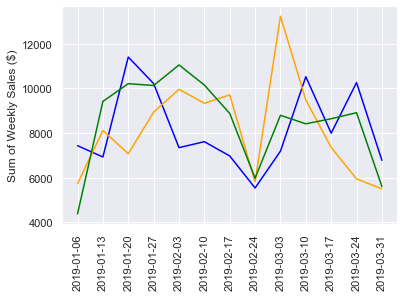

In [258]:
fig, ax = plt.subplots()
ax = plt.plot(A_weeksum.index, A_weeksum['Total'], color='blue')
ax = plt.plot(B_weeksum.index, B_weeksum['Total'], color='orange')
ax = plt.plot(C_weeksum.index, C_weeksum['Total'], color='green')
plt.ylabel('Sum of Weekly Sales ($)')
plt.xticks(A_week.index, visible=True, rotation="vertical");

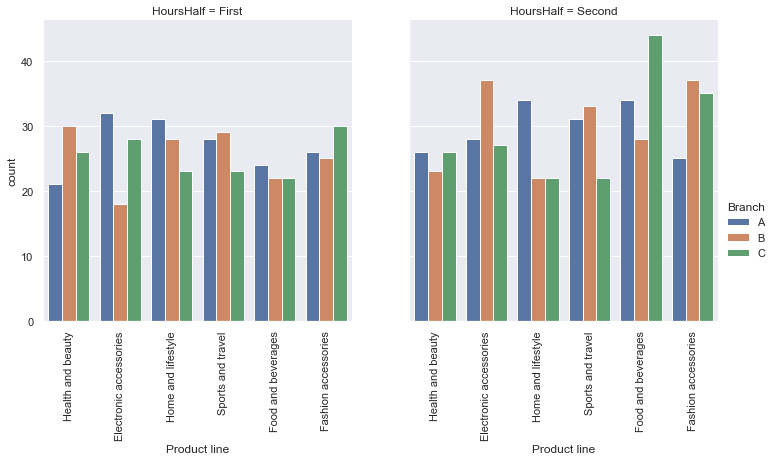

In [328]:
g = sns.catplot(x='Product line', hue='Branch', hue_order = ['A', 'B', 'C'], col='HoursHalf', data= sales, kind='count')
g.set_xticklabels(rotation=90)

## What items sold the best throughout all of the branches?

### Number of products per product line at each store

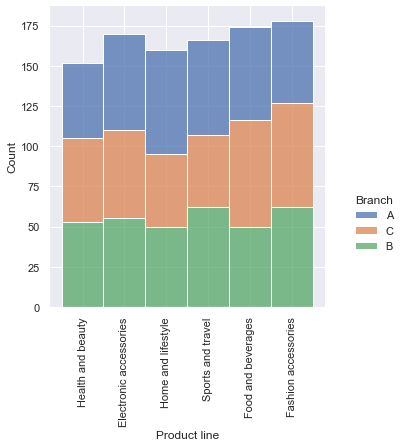

In [336]:
g = sns.displot(sales, x='Product line', hue='Branch', multiple='stack')
g.set_xticklabels(rotation=90);

### Number of total units sold at all stores

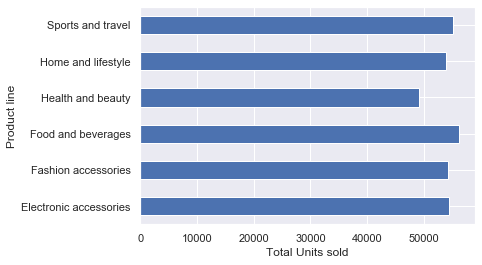

In [304]:
sales.groupby('Product line')['Total'].sum().plot(kind='barh')
plt.xlabel('Total Units sold');

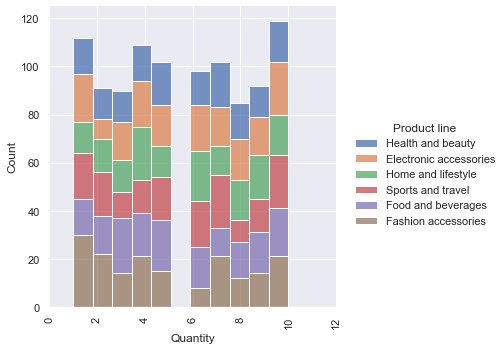

In [339]:
g = sns.displot(sales, x='Quantity', hue='Product line', multiple='stack')
g.set_xticklabels(rotation=90);

## Which Product line should be focused on with the highest number of items that have the highest profit margin?

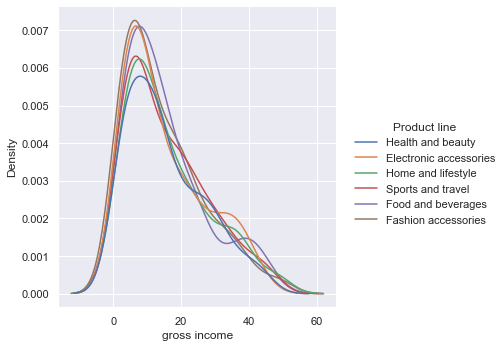

In [335]:
sns.displot(sales, x='gross income', hue='Product line', kind='kde');